<a href="https://colab.research.google.com/github/mara-eli17/HypBilliards/blob/master/HyperbolicBilliards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To run Manim Community on Google Colab, see https://docs.manim.community/en/stable/index.html#
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade
#NOTE: After running this cell, restarting the runtime is necessary

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [867 kB]
Hit:13 http://ppa.laun

     |████████████████████████████████| 792 kB 7.7 MB/s 
     |████████████████████████████████| 374 kB 67.7 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: IPython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.0 which is incompatible.


# Secțiune nouă

In [ ]:
from manim import *
import numpy as np

Manim Community v0.14.0

In [ ]:
def refl(r,z):
  # This function reflects the point z using the reflection r
  # Input : r : A 2x2 reflection matrix matrix 
  #         z : a point z 
  # Output: the reflection of z
    if z!= -1j:
        return xi_inv((r[0,0] * np.conjugate(xi(z)) +r[0,1]) / (r[1,0] * np.conjugate(xi(z)) +r[1,1]))
    else:
        if r[1,0] != 0:
            return xi_inv(r[0,0]/r[1,0])
        else:
            return -1j

In [ ]:

def xi(z):
  # xi is the transformation we use to go from the Poincare disk to the upper half plane
    return (1j * z + 1) / (- z - 1j)

def xi_inv(z):
    return (-1j * z - 1) / ( z + 1j)


In [ ]:
def mov(coords):
  # TODO: Poincare disk or half plane ???
  # This function takes a billiard trajectory and animates the movement respecting the hyperbolic metric. 
  # Input: coords : A billiard trajectory. Two consecutive entries in the list coords are a segment of the billiard trajectory
  # Output: movement_coords : A list containing the coords of a ball moving along the input trajectory
  cnt=0
  movement_coords = [coords[0]]

  # Loop over every segment of the trajectory
  for ite in range(len(coords)-1):
    s = coords[ite]
    e = coords[ite+1]
    # find ideal points of geodesic
    a,b = H2_segment(s,e).get_ideal_endpoints()
    # initialize time step
    delta_t = 0.1
    # initialize time 
    t=0
    # initialize time until hit
    t_hit = abs(np.log(m(a,b,s) / m(a,b,e)))

    # Compute the coordinates of the current segment
    for j in range(math.floor(t_hit / delta_t)):
        movement_coords.append(gamma_D(s,e,a,b,t))
        t = t + delta_t
        cnt = cnt +1
  return movement_coords

In [ ]:
def getRightPlottingOrder(phi1,phi2):
  # Given the angles of two ideal enpoints of an hyperbolic line, this function checks whether they have the
  # right order for plotting in manim
  # Input phi1,phi2: Angles of ideal endpoints on the Poincare disk
  if phi1 >= 180:
    if phi2 > phi1 -180 and phi2 < phi1:
      return True
    else:
      return False
  else:
    if phi2 > phi1 and phi2 < phi1 +180:
      return False
    else:
      return True

In [ ]:
def reorder(coords):
  # Since manim plots arcs with center of the arc to the left of the arc, we have to find the right orientation of the arcs. 
  ordered_coords = np.zeros((len(coords)-1,2), dtype=np.complex_)
  for i in range(len(coords)-1):
    if getRightPlottingOrder((np.angle(coords[i],True)+360)%360, (np.angle(coords[i+1],True)+360)%360):
      ordered_coords[i,0] = coords[i]
      ordered_coords[i,1] = coords[i+1]
    else:
      ordered_coords[i,0] = coords[i+1]
      ordered_coords[i,1] = coords[i]
  return ordered_coords

# StartBilliard

In [ ]:
def get_circle(z1,z2):
  # Given two points in the upper half plane, return the corresponding center and radius for the hyperbolic segment connecting them
  # Input : z1,z2 : two points in the upper half plane
  c = (np.abs(z1)**2 - np.abs(z2)**2) / (2 *(z1.real-z2.real))
  r = np.sqrt((z1.real-c)**2 + z1.imag**2)
  return c,r

In [ ]:
def reflUHP(r,z):
  # This function reflects the point z in the upper half plane using the reflection r
  # Input : r : A 2x2 reflection matrix matrix 
  #         z : a point z 
  # Output: the reflection of z
  return (r[0,0] * np.conjugate(z) +r[0,1]) / (r[1,0] * np.conjugate(z) +r[1,1])

In [ ]:
def pos_to_geodesicPD(x,phi):
    # This function  computes corresponding geodesic for given initial position and direction.
    # For details, see the documentation
    # Input : x : point in poincare disk
    #         phi : direction for geodesic
    # Output: The ideal endpoint of the trajectory
    
    # First compute the two ideal entpoints 
    r = (1-np.abs(x)**2)/(2*(-x.real*np.sin(phi) + x.imag*np.cos(phi)))
    c = x + r * (-np.sin(phi)+ 1j *np.cos(phi))
    d0 = (1 - np.abs(r)**2 + np.abs(c)**2)/(2 * np.abs(c))
    e0 = np.sqrt(1-d0**2)
    P1 = d0 * c / np.abs(c) + e0 / np.abs(c) * (-c.imag + c.real*1j)
    P2 = d0 * c / np.abs(c) - e0 / np.abs(c) * (-c.imag + c.real*1j)

    # Find out which point is the right one.
    a = 1
    b = 2 * (x.real *np.cos(phi)+ x.imag *np.sin(phi))
    c = np.abs(x)**2 -1
    t1 = 1/2 * (-b + np.sqrt(b**2-4*c))
    t2 = 1/2 * (-b - np.sqrt(b**2-4*c))
    if t1>0:
        TP = x + t1 * (np.cos(phi)+1j*np.sin(phi))
    else: 
        TP = x + t2 * (np.cos(phi)+1j*np.sin(phi)) 
    
    if np.abs(P1-TP)<np.abs(P2-TP):
        return P1
    else:
        return P2


In [ ]:
def reflect(ref,eta, ideal_endpoint, point):
  # This function reflects the points ideal_endpoint and point. The ideal_endpoint tells us along which 
  # side of the polygon (given by eta) we have to reflect. ref contains the reflections along these sides.
  # Input : ref: list of reflections
  #         eta: list of parameters for ideal polygon (ideal endpoints in upper half plane)
  #         ideal_endpoint: ideal_endpoint to be reflected. It tells us along which side we need to reflect
  #         point: point to be reflected
  # Output: reflection of ideal_endpoint and point
  
  for i in range(len(eta)-1):
    if ideal_endpoint > eta[i] and ideal_endpoint < eta[i+1]:
      return reflUHP(ref[i],ideal_endpoint), reflUHP(ref[i],point)
  if ideal_endpoint < -1:
      return reflUHP(ref[-1],ideal_endpoint), reflUHP(ref[-1],point)
  if ideal_endpoint > 1:
      return reflUHP(ref[-2],ideal_endpoint), reflUHP(ref[-2],point)
  print("Cornerpoint")
  return -1j,-1j

In [ ]:
def intersection_points_of_circles(r1, r2, c1, c2):
    x1, y1 = c1.real, c1.imag
    x2, y2 = c2.real, c2.imag
    d12 = np.abs((c2 - c1))
    d0 = ((r1 ** 2) - (r2 ** 2) + (d12 ** 2)) / (2 * d12)
    if (r1 ** 2) - (d0 ** 2) > 0:
        e0 = np.sqrt(r1 ** 2 - d0 ** 2)
        m = (x2 - x1) / d12 + (y2 - y1) / d12 * 1j
        n = (y1 - y2) / d12 + (x2 - x1) / d12 * 1j
        p1 = c1 + d0 * m + e0 * n
        p2 = c1 + d0 * m - e0 * n
        ok = True
    else:
        p1 = p2 = 0 + 0j
        ok = False
    return p1, p2, ok

def intersection_points_line_circle(r, c, a, b):
    if np.abs(a.real-b.real) <1e-9:
        #corrected the condition here
        if r ** 2 - (a.real - c.real) ** 2 < 0:
            p1 = p2 = 0 + 0j
            ok = False
        else:
            #corrected the formulas here
            #print("r,a,c,",r,a,c)
            p1 = a.real + (c.imag + np.sqrt((r ** 2) - (a.real - c.real) ** 2)) * 1j
            p2 = a.real + (c.imag - np.sqrt((r ** 2) - (a.real - c.real) ** 2)) * 1j
            ok = True
    else:
        m  = (b.imag - a.imag) / (b.real - a.real)
        # instead of m * c.real - c.imag it must be m * a.real - a.imag
        d = m * a.real - a.imag - m * c.real + c.imag
        if (r ** 2) * ((m ** 2) + 1) > d ** 2:
            x1 = c.real + (m * d - np.sqrt(r ** 2 * (m ** 2 + 1) - d ** 2)) / (m ** 2 + 1)
            x2 = c.real + (m * d + np.sqrt(r ** 2 * (m ** 2 + 1) - d ** 2)) / (m ** 2 + 1)
            y1 = c.imag + (-d - m * np.sqrt(r ** 2 * (m ** 2 + 1) - d ** 2)) / (m ** 2 + 1)
            y2 = c.imag + (-d + m * np.sqrt(r ** 2 * (m ** 2 + 1) - d ** 2)) / (m ** 2 + 1)
            p1 = x1 + y1 * 1j
            p2 = x2 + y2 * 1j
            ok = True
        else:
            p1 = p2 = 0 + 0j
            ok = False
    return p1, p2, ok

In [ ]:
def intersect(z1,z2,w1,w2):
  # returns the intersection between the two segments z1-z2 and w1-w2
  if np.abs(z1.real-z2.real) < 1e-9 and np.abs(w1.real-w2.real) <1e-9:
    p1 = intersection_points(z1,z2,w1,w2)
    return p1
  elif np.abs(z1.real-z2.real) >= 1e-9 and np.abs(w1.real-w2.real)<1e-9:
    c,r = get_circle(z1,z2)
    p1,p2,ok = intersection_points_line_circle(r,c, w1,w2)
    if p1.imag > -1e-9:
      return p1
    elif p2.imag > -1e-9:
      return p2
  elif np.abs(z1.real-z2.real) < 1e-9 and np.abs(w1.real-w2.real)>=1e-9:
    c,r = get_circle(w1,w2)
    p1,p2,ok = intersection_points_line_circle(r,c, z1,z2)
    if p1.imag > -1e-9:
      return p1
    elif p2.imag > -1e-9:
      return p2
  elif np.abs(z1.real-z2.real) >= 1e-9 and np.abs(w1.real-w2.real)>=1e-9:
    c1,r1 = get_circle(w1,w2)
    c2,r2 = get_circle(z1,z2)
    p1,p2,ok = intersection_points_of_circles(r1,r2,c1,c2)
    if p1.imag > -1e-9:
      return p1
    elif p2.imag > -1e-9:
      return p2

In [ ]:
def findCol(eta, ideal, point):
  # This function finds the  collision point between polygon(parameters given by eta) and the (hyperbolic) line connecting ideal and point.
  # Input : eta: list of parameters for ideal polygon (ideal endpoints in upper half plane)
  #         ideal,point : Points in upper half plane, determining a hyperbolic segment
  # Output: collision point between polygon(parameters given by eta) and the (hyperbolic) line connecting ideal and point.
  for i in range(len(eta)-1):
    if ideal> eta[i] and ideal < eta[i+1]:
      return intersect(eta[i],eta[i+1],ideal,point)
  if ideal< -1:
      return intersect(-1,-1+1j,ideal,point)
  if ideal > 1:
      return intersect(1,1+1j,ideal,point)
  print("no intersection found!")

In [ ]:
from h2geometry import *
def prepareManimDrawing(eta, coords ):
  # Here we just convert the obtained coords, which are given in the upper half plane model to the poincare disk.
    # We prepare everything for plotting in manim. 
    # Input:  eta           : ideal points of polygon in upper half plane
    #         coords        : coords of trajectory in upper half plane
    # Output: coordsPD      : coords of trajectory positions
    #         radiiPD       : the radii of segments in coordsPD
    #         ordered_coords: coords ordered, needed for plotting of arcs in manim 
    #         pol_coords    : coords of the vertices of the polygon
    #         pol_radii     : radii of the polygon segments
    
    nr = len(eta)+1
    pol_coords =[]
    for i in range(len(eta)):
      pol_coords.append(xi_inv(eta[i]))
    pol_coords.append(-1j)

    pol_radii = []
    for i in range(len(pol_coords)):
      r,c = H2_segment(pol_coords[i],pol_coords[(i+1)%nr]).get_circle()
      pol_radii.append(r)

    coordsPD = []
    for i in range(len(coords)):
      coordsPD.append(xi_inv(coords[i]))
    radiiPD = []
    for i in range(len(coords)-1):
      r,c = H2_segment(coordsPD[i],coordsPD[i+1]).get_circle()
      radiiPD.append(r)
    ordered_coords = reorder(coordsPD)
    #movement_coords = mov(coordsPD)
    return coordsPD, radiiPD, ordered_coords, pol_coords, pol_radii

In [ ]:
def start_billiards_PD(N,eta, z, angle):
    # This function creates billiard trajectories
    # Input : N             : Number of side hits we want to simulate
    #         eta           : list of parameters for ideal polygon (ideal endpoints in upper half plane)
    #         z             : initial position
    #         angle         : initial direction direction in radians
    # Output: coords      : coords of trajectory positions in upper half plane

    # We try to do most calculations in the upper half plane. Only the first segment is determined in the poincare disk.

    points = []
    for j in range(len(eta)):
        points.append(xi_inv(eta[j]))
    points.append(-1j)

    # build reflections
    ref = []
    for l in range(1,len(eta)):
        ref.append(1/(eta[l]-eta[l-1]) * np.array([[eta[l-1]+eta[l], - 2 * eta[l-1] * eta[l]], [2, -(eta[l-1]+eta[l])]]))
    ref.append(np.array([[-1, 2], [0,1]]))
    ref.append(np.array([[-1, -2],[0, 1]]))

    coords = [xi(z)]

    for i in range(N):
        if i == 0:
            #find the first trajectory of the ball
            ideal_endpoint = xi(pos_to_geodesicPD(z, angle))
            #search for the collision point coll_p of the ball with one side s of the 
            coll_p = findCol(eta,ideal_endpoint, xi(z))
        else:
            # find next trajectory
            ideal_endpoint, start = reflect(ref, eta, ideal_endpoint, coll_p)
            #search for the collision point coll_p of the ball with one side s of the 
            coll_p = findCol(eta,ideal_endpoint, start)
        coords.append(coll_p)
    return coords
    


In [ ]:
# specify the ideal points of the polygon in the upper half plane. (If you want to specify them in the poincare disk, use xi_inv to obtain the etas.)
# Currently only works for eta starting with -1 and ending with 1. There is a vertex at infinity. Up to isometry, these are the only ideal polygons anyway.
eta = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,0,0.2,0.3,0.4,1]
nr = len(eta)+1
# obtain the coords of the trajectory in the upper half plane
coords = start_billiards_PD(500, eta,0.5, 3.1)
# prepare the data for drawing in manim
coordsPD, radiiPD, ordered_coords, pol_coords, pol_radii = prepareManimDrawing(eta, coords)

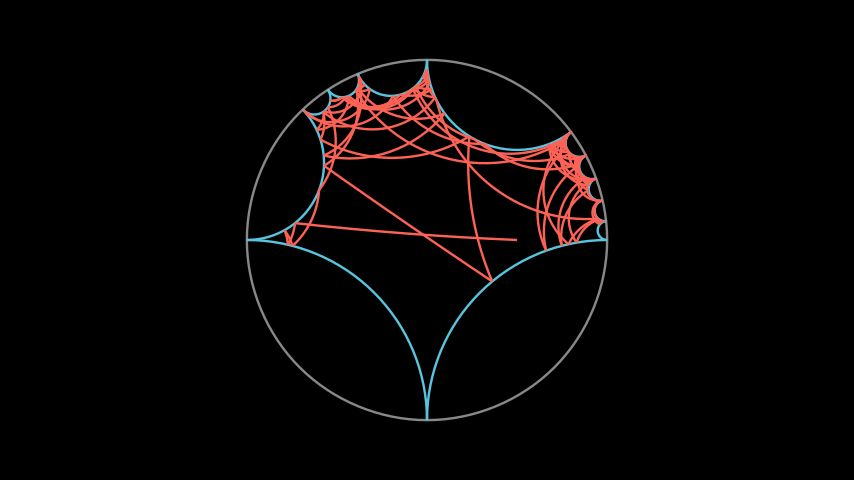

In [ ]:
# Here we plot the billiard trajectory
%%manim -ql -v WARNING  StartBilliard

class StartBilliard(Scene):
    def construct(self):
        vg = VGroup()

        circle = Circle(radius=1, stroke_color=GREY)
        vg.add(circle)

        for i in range(len(pol_radii)):
          arc = ArcBetweenPoints(start=[pol_coords[(i+1)%nr].real,pol_coords[(i+1)%nr].imag,0],end =[pol_coords[i].real,pol_coords[i].imag,0], radius = pol_radii[i], stroke_color=BLUE)
          vg.add(arc)
        for i in range(len(radiiPD)):
          if radiiPD[i] ==-1:
            # for lines
            arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=RED)
          else:
            arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=RED)
          vg.add(arc)
        self.add(vg.scale(3))


# Building closed Trajectories

In [ ]:
def buildTrajectory(eta, code):
    # This function creates closed billiard trajectories with given code
    # Input : eta           : list of parameters for ideal polygon (ideal endpoints in upper half plane)
    #         code          : Sequence of edges the trajectory has to hit
    # Output: coords        : coords of trajectory positions in upper half plane

    # build reflections
    r = []
    for l in range(1,len(eta)):
        r.append(1/(eta[l]-eta[l-1]) * np.array([[eta[l-1]+eta[l], - 2 * eta[l-1] * eta[l]], [2, -(eta[l-1]+eta[l])]]))
        #print(det(r[l]))
    r.append(np.array([[-1, 2], [0,1]]))
    r.append(np.array([[-1, -2],[0, 1]]))
    
    # build T
    T = np.eye(2)
    for l in range(len(code)):
        T = np.matmul(T, r[code[l]])
    # find ideal endpoints
    diskr = np.sqrt((T[1,1]-T[0,0])**2 + 4 * T[0,1] * T[1, 0])
    #print(diskr)
    #print(T[1,0])
    x_1 = ((T[0,0]-T[1,1]) + diskr ) / (2 * T[1,0])
    x_2 = ((T[0,0]-T[1,1]) - diskr ) / (2 * T[1,0])

    coords = []
    #print(x_1,x_2)
    coords.append(findCol(eta, x_1, x_2))
    coords.append(findCol(eta, x_2, x_1))
    ideal_endpoint = x_2
    #print(ideal_endpoint)
    coll_p = coords[1]

    for i in range(len(code)-1):
        ideal_endpoint, start = reflect(r, eta, ideal_endpoint, coll_p)
        #search for the collision point coll_p of the ball with one side s of the polygon
        coll_p = findCol(eta,ideal_endpoint, start)
        coords.append(coll_p)
    return coords


In [ ]:
# specify the ideal points of the polygon in the upper half plane. (If you want to specify them in the poincare disk, use xi_inv to obtain the etas.)
# Currently only works for eta starting with -1 and ending with 1. There is a vertex at infinity. Up to isometry, these are the only ideal polygons anyway.
eta = [-1,0,1]
nr = len(eta)+1
# specify the edge sequence for the trajectory which we want to construct. Make sure, it is a valid edge sequence. 
code = [0,2,1,3,2,0,3,1]
# obtain the coords of the trajectory in the upper half plane
coords = buildTrajectory(eta,code)
# prepare the data for drawing in manim
coordsPD, radiiPD, ordered_coords, pol_coords, pol_radii = prepareManimDrawing(eta, coords)

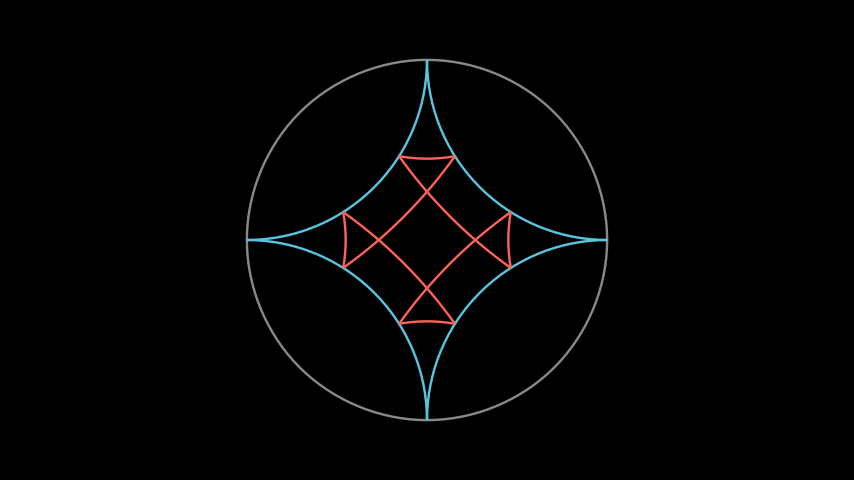

In [ ]:
# This draws the closed trajectory in the Poincare disk
%%manim -ql -v WARNING  BuildClosedTrajectory

class BuildClosedTrajectory(Scene):
    def construct(self):
        vg = VGroup()

        # Draw boundary of the Poincare disk
        circle = Circle(radius=1, stroke_color=GREY)
        vg.add(circle)

        # Loop over all polygon sides
        for i in range(len(pol_radii)):
          # add the polygon side to the VGroup
          arc = ArcBetweenPoints(start=[pol_coords[(i+1)%nr].real,pol_coords[(i+1)%nr].imag,0],end =[pol_coords[i].real,pol_coords[i].imag,0], radius = pol_radii[i], stroke_color=BLUE)
          vg.add(arc)
        # Loop over all trajectory segments
        for i in range(len(radiiPD)):
          # Distinguish between Euklidean lines and circles
          if radiiPD[i] ==-1:
            # for lines
            arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=RED)
          else:
            # for circles
            arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=RED)
          vg.add(arc)
        self.add(vg.scale(3))

## Phasespace plotting

In [ ]:
def code_is_valid(c_tmp):
  # This function checks whether the given code corresponds to a closed billiard trajectory
  # Input: c_tmp : the code to be checked
  # Output: True if c_tmp is valid code, False otherwise
  if len(np.unique(c_tmp)) < 3:
    return False
  for i in range(len(c_tmp)):
    if c_tmp[i] == c_tmp[(i+1)%len(c_tmp)]:
      return False
  return True

In [ ]:
def code_contained(codes,c_tmp):
  # This function checks whether the code c_tmp is already contained in the list of codes
  # Input:  c_tmp : the code to be checked
  #         codes : list of codes
  # Output: True if code is already contained
  for code in codes:
    for j in range(len(code)):
      if (np.roll(code,j) == c_tmp).all():
        return True
  return False

In [ ]:
def getCodes(n, l):
  # This is an old slow version
  # This function builds all the billiard codes up to length l for an n sided ideal polygon
  # Input:  n: number of sides of considered polygon
  #         l: length of the codes we want to return
  # Output: billiard codes up to length l for an n sided ideal polygon
  # rules: have to have more than 3 different sides we hit, no immediate repetitions
  # first we construct the codes with length 3
  codes_length_3 = []
  for i in range(n):
    for j in range(n):
      for k in range(n):
        c_tmp = np.array([i,j,k])
        if code_is_valid(c_tmp):
          # check whether the newly constructed code c_tmp is not already contained in codes_tmp
          if not code_contained(codes_length_3,c_tmp):
          # add the newly constructed code c_tmp to codes_tmp
            codes_length_3.append(c_tmp)  
  codes = [codes_length_3]
  # build codes of length i+3 from codes of length i+2
  for i in range(1,l-2):
    codes_tmp = []
    # pick side c with which new code should start
    for c in range(n):
      # pick code of length i+2
      for code in codes[i-1]:
        # pick a roll parameter by which code will be rolled
        for j in range(i):
          c_tmp = np.zeros(i+3,dtype=int)
          c_tmp[0] = c
          c_tmp[1:] = np.roll(code,j)
          # check whether the new constructed code c_tmp is valid
          if code_is_valid(c_tmp):
            # check whether the newly constructed code c_tmp is not already contained in codes_tmp
            if not code_contained(codes_tmp,c_tmp):
            # add the newly constructed code c_tmp to codes_tmp
              codes_tmp.append(c_tmp)
      # append codes_tmp to codes
    codes.append(codes_tmp)
  return codes

In [ ]:
def generate(n, l):  
  # This function builds all the billiard codes of length n for an l sided ideal polygon
  # Input:  l: number of sides of considered polygon
  #         n: length of the codes we want to return
  # Output: all the billiard codes of length l

  S = [str(i) for i in range(l)]
  k = len(S)
  S.sort()

  # Loop till w is not empty
  w = [-1]
  codes = []
  while w:
    
      # Incrementing the last character
      w[-1] += 1
      m = len(w)
      if m == n:
          codes.append(np.array([int(S[i]) for i in w]))
          #codes.append(''.join(S[i] for i in w))
      
      # Repeating w to get a
      # n-length string
      while len(w) < n:
          w.append(w[-m])
      
      # Removing the last character
      # as long it is equal to
      # the largest character in S
      while w and w[-1] == k - 1:
          w.pop()
  # delete all unvalid codes and convert to numpy arrays
  bools = []
  for i in range(len(codes)):
    if  code_is_valid(codes[i]):
      bools.append(i)
  bools = np.array(bools)
  codes = np.array(codes)
  codes = codes[bools,:]
  return codes

In [ ]:
def generate_up(n,l):
  # This function builds all the billiard codes up to length n for an l sided ideal polygon
  # Input:  l: number of sides of considered polygon
  #         n: length of the codes we want to return
  # Output: billiard codes up to length l for an n sided ideal polygon
  codes = []
  for i in range(3,n+1):
    codes.append(generate(i,l))
  return codes

In [ ]:
def getIdealEnpoints(z1,z2):
  # This function computes the ideal endpoints of the segment z1-z2 in the upper half plane
  # Input:  z1-z2: segment z1-z2 in the upper half plane
  # Output: ideal endpoints
  c,r = get_circle(z1,z2)
  return np.array([c-r,c+r])

In [ ]:
def generatePhasespacePoints(eta, n):
  # This function builds all the phasespace points of periodic billiard trajectories up to length n for an l sided ideal polygon
  # Input:  eta: Ideal polygon parameters in upper half plane (must start with -1, end with 1)
  #         n: length of the codes we want to return
  # Output: p(array : #phasespace_points x 3): phasespace points of periodic billiard trajectories up to length n for an l sided ideal polygon
  #                                          : entries: (angle1, angle2, trajectory_length-3)   
  # Generate codes for ideal polygon with 4 sides
  l = len(eta)+1
  codes = generate_up(n,l)

  # Here we compute all the phasespace points corresponding to the above generated codes

  phasespace_points = []
  
  # Loop over all codes lengths
  for i in range(len(codes)):
    # Loop over all codes with length dictated by i
    for k in range(len(codes[i])):
      # For the specific code, compute the trajectory
      coords = buildTrajectory(eta, codes[i][k,:].tolist())
      # Loop over each segment in the trajectory
      for j in range(len(coords)-1):
        # Compute the two angles determining the segment
        e = getIdealEnpoints(coords[j],coords[j+1])
        phi0 = (np.angle(xi_inv(e[0]),deg=True) +360)%360
        phi1 = (np.angle(xi_inv(e[1]),deg=True) +360)%360
        # Add the phasespace point to the list, remember the length i (Length of trajectory is actually i+3 )
        phasespace_points.append([phi0,phi1,i])
        # We also want the segments into the other direction
        phasespace_points.append([phi1,phi0,i])
  # convert to numpy array
  p = np.array(phasespace_points)
  # The flip is just for drawing such that phasespace points corresponding to longer trajectories are plotted first. 
  # Otherwise the few points belonging to short trajectories would't be visible
  p = np.flip(p, axis=0)
  return p

In [ ]:
# Specify the ideal polygon
eta = [-1.,-0.5, 0., 0.5, 1.]
# Generate phasespace points
p = generatePhasespacePoints(eta, 6)
# Prepare stuff to draw the polygon
coordsPD, radiiPD, ordered_coords, pol_coords, pol_radii = prepareManimDrawing(eta, [-1])

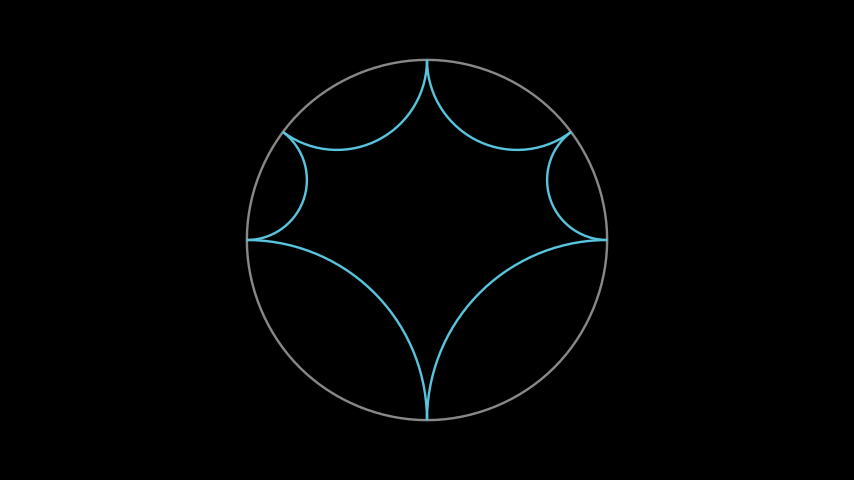

In [ ]:
# Visualize how the ideal polygon looks like
%%manim -ql -v WARNING  IdealPolygon

class IdealPolygon(Scene):
    def construct(self):
        vg = VGroup()

        circle = Circle(radius=1, stroke_color=GREY)
        vg.add(circle)

        for i in range(len(pol_radii)):
          arc = ArcBetweenPoints(start=[pol_coords[(i+1)%nr].real,pol_coords[(i+1)%nr].imag,0],end =[pol_coords[i].real,pol_coords[i].imag,0], radius = pol_radii[i], stroke_color=BLUE)
          vg.add(arc)
        self.add(vg.scale(3))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Visualize the phasespace points from above
plt.style.use('dark_background')
figure(figsize=(14, 14), dpi= 1000)
plt.scatter(p[:,0],p[:,1], c= p[:,2],marker =',', s=0.05, cmap = 'gist_rainbow')
plt.axis('off')
#plt.savefig("phasespace.png", dpi = 1200)

# Plotting all closed trajectories up to some length

In [ ]:
def buildPeriodicTrajectories(eta, n):
  # This function builds all the billiard trajectories up to length n for the polygon given by eta
  # Input:  eta: Ideal polygon parameters in upper half plane (must start with -1, end with 1)
  #         n: length of the codes we want to return
  # Output: trajectories: list of tuples (coordinates of the trajectory, length of trajectory-3)  
  # Generate codes for ideal polygon with l sides

  l = len(eta) + 1
  codes = generate_up(n,l)

  trajectories = []

  for i in range(len(codes)):
    for k in range(len(codes[i])):
      coords = buildTrajectory(eta, codes[i][k,:].tolist())
      trajectories.append([coords, i])
  return trajectories

In [ ]:
eta = [-1., 0., 0.2, 1.]
nr = len(eta) +1
trajectories = buildPeriodicTrajectories(eta,6)
trajectoriesPD = []
for coords,length in trajectories:
  coordsPD, radiiPD, ordered_coords, pol_coords, pol_radii = prepareManimDrawing(eta, coords)
  trajectoriesPD.append([coordsPD,radiiPD,ordered_coords, length])
trajectoriesPD.reverse()
width_parameter = 5

In [ ]:
# Here we draw many periodic trajectories
%%manim -qk -v WARNING  MultiplePeriodicTrajectories

class MultiplePeriodicTrajectories(Scene):
    def construct(self):
        vg = VGroup()

        circle = Circle(radius=1, stroke_color=WHITE)
        vg.add(circle)

        for i in range(len(pol_radii)):
          arc = ArcBetweenPoints(start=[pol_coords[(i+1)%nr].real,pol_coords[(i+1)%nr].imag,0],end =[pol_coords[i].real,pol_coords[i].imag,0], radius = pol_radii[i], stroke_width = 0.5,stroke_color=BLUE)
          vg.add(arc)
        for coordsPD, radiiPD, ordered_coords, length in trajectoriesPD:
          if length ==0:
            for i in range(len(radiiPD)):
              if radiiPD[i] ==-1:
                # for lines
                arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=PURPLE, stroke_width = 1/(width_parameter * length+width_parameter))
              else:
                arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=PURPLE, stroke_width = 1/(width_parameter * length+width_parameter))
              vg.add(arc)
          if length ==1:
            for i in range(len(radiiPD)):
              if radiiPD[i] ==-1:
                # for lines
                arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=MAROON, stroke_width = 1/(width_parameter * length+width_parameter))
              else:
                arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=MAROON, stroke_width = 1/(width_parameter * length+width_parameter))
              vg.add(arc)
          if length ==2:
            for i in range(len(radiiPD)):
              if radiiPD[i] ==-1:
                # for lines
                arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=RED_D, stroke_width = 1/(width_parameter * length+width_parameter))
              else:
                arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=RED_D, stroke_width = 1/(width_parameter * length+width_parameter))
              vg.add(arc)
          if length ==3:
            for i in range(len(radiiPD)):
              if radiiPD[i] ==-1:
                # for lines
                arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=GOLD_C, stroke_width = 1/(width_parameter * length+width_parameter))
              else:
                arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=GOLD_C, stroke_width = 1/(width_parameter * length+width_parameter))
              vg.add(arc)
          if length ==4:
            for i in range(len(radiiPD)):
              if radiiPD[i] ==-1:
                # for lines
                arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=YELLOW_B, stroke_width = 1/(width_parameter * length+width_parameter))
              else:
                arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=YELLOW_B, stroke_width = 1/(width_parameter * length+width_parameter))
              vg.add(arc)
          if length ==5:
            for i in range(len(radiiPD)):
              if radiiPD[i] ==-1:
                # for lines
                arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=GREEN_A, stroke_width = 1/(width_parameter * length+width_parameter))
              else:
                arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=GREEN_A, stroke_width = 1/(width_parameter * length+width_parameter))
              vg.add(arc)
        self.add(vg.scale(3))

# Compact Polygons

In [ ]:
def initCompactPolygon(vertices):
  eta = np.zeros((len(vertices),2))
  for i in range(len(vertices)):
    eta[i,:] = getIdealEnpoints(vertices[i],vertices[(i+1)%len(vertices)])
  return eta

In [ ]:
def findColCompact(eta,ordered_vertices, ideal, point, prev_index):
  # find collision point between polygon(parameters given by eta) and the line connecting ideal and point.
  e1,e2 = getIdealEnpoints(ideal, point)
  #print("e1,e2", e1,e2)
  #print(eta.shape[0])
  for i in range(eta.shape[0]):
    if i != prev_index:
      if (e1> eta[i,0] and e1 < eta[i,1] and (e2>eta[i,1] or e2< eta[i,0])) or (e2> eta[i,0] and e2 < eta[i,1] and (e1>eta[i,1] or e1< eta[i,0])):
        #print("test",i)
        #print("e1,e2,eta0,eta1", e1,e2,eta[i,0],eta[i,1])
        inter_p = intersect(eta[i,0],eta[i,1],ideal,point)
        #print("inter_p", inter_p)
        #print("ordered_vertices",ordered_vertices[i,:])
        if inter_p.real > ordered_vertices[i,0] and inter_p.real < ordered_vertices[i,1].real:
          #print("test2")
          return inter_p,i
  print("no intersection found!")

In [ ]:
def start_compact_billiards_UHP(N,vertices, z, angle):
  #vertices: vertices in UHP
  # z: initial position, given in PD
  # angle: given in Poincare disk
  # N: number of hits
    eta = initCompactPolygon(vertices)
    ordered_vertices = np.zeros((len(vertices),2),dtype = complex)
    ordered_vertices[:,0] = vertices
    ordered_vertices[:,1] = np.roll(vertices,-1)
    ordered_vertices = np.sort(ordered_vertices,axis=1)

    # build reflections
    ref = []
    for l in range(len(vertices)):
        ref.append(1/(eta[l,1]-eta[l,0]) * np.array([[eta[l,0]+eta[l,1], - 2 * eta[l,0] * eta[l,1]], [2, -(eta[l,0]+eta[l,1])]]))

    coords = [xi(z)]
    #ideal_endpoints_angles = np.zeros((N,2))

    for i in range(N):
        if i == 0:
            #find the trajectory of the ball
            #print("xi(z)",xi(z))
            ideal_endpoint = pos_to_geodesicPD(z, angle)
            #search for the collision point coll_p of the ball with one side s of the 
            coll_p, index = findColCompact(eta, ordered_vertices, ideal_endpoint, xi(z),-1)
        else:
            #print("ideal_endpoint, coll_p", ideal_endpoint, coll_p)
            ideal_endpoint = reflUHP(ref[index],ideal_endpoint)
            start = reflUHP(ref[index],coll_p)
            #print("ideal_endpoint, coll_p", ideal_endpoint, coll_p)
            #search for the collision point coll_p of the ball with one side s of the 
            coll_p, index = findColCompact(eta,ordered_vertices, ideal_endpoint, coll_p, index)
        coords.append(coll_p)
        #print("index", index)
    return coords, ordered_vertices


In [ ]:

#vertices = [-1+0.3j,1+0.3j,2+0.2j,2j]
vertices_PD = 0.8 * np.exp(2 * np.pi * 1j/16 * (np.arange(16)+1/2)   )
vertices = np.sort([xi(vertices_PD[i]) for i in range(16) ])

eta = initCompactPolygon(vertices)
N= 100
z = xi_inv(1.1j)
angle= 0  # angle in poincare disk

coords,ordered_vertices = start_compact_billiards_UHP(N,vertices, z, angle)

(0.995475113122172-0.09502262443438922j) (-0.995475113122172-0.09502262443438922j)
(-1.1-6.106226635438361e-17j) (1.1-6.106226635438361e-17j)


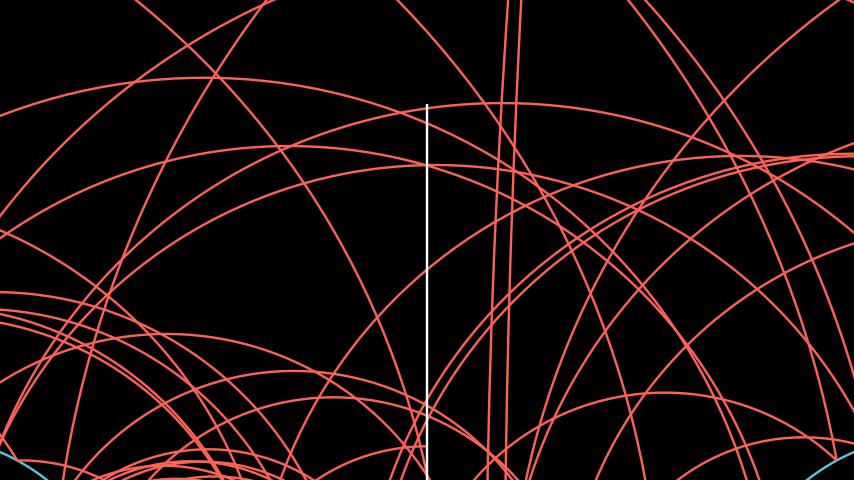

In [ ]:
# Example of using the built-in %%manim IPython magic command
%%manim -ql -v WARNING  ArcBetweenPointsExample

class ArcBetweenPointsExample(Scene):
    def construct(self):
        vg = VGroup()

        for i in range(len(eta)):
          arc = ArcBetweenPoints(start=[ordered_vertices[i,1].real,ordered_vertices[i,1].imag,0],end =[ordered_vertices[i,0].real,ordered_vertices[i,0].imag,0], radius = (eta[i,1]-eta[i,0])/2, stroke_color=BLUE)
          vg.add(arc)
        
        for i in range(len(coords)-1):
          c,r = get_circle(coords[i],coords[i+1])
          if coords[i].real > coords[i+1].real:  
            arc = ArcBetweenPoints(start=[coords[i].real,coords[i].imag,0], end=[coords[i+1].real,coords[i+1].imag,0], radius = r, stroke_color=RED)
          else:
            arc = ArcBetweenPoints(start=[coords[i+1].real,coords[i+1].imag,0], end=[coords[i].real,coords[i].imag,0], radius = r, stroke_color=RED)
          vg.add(arc)

        vg.add(Line(start = [-3,0,0],end = [3,0,0]))
        vg.add(Line(start = [0,0,0],end = [0,3,0]))
        
        #vg.add(Dot(color=RED, radius=0.05).move_to([ideal_endpoint.real,ideal_endpoint.imag,0]))
        #vg.add(Dot(color=BLUE, radius=0.05).move_to([coll_p.real,coll_p.imag,0]))
        
        self.add(vg.scale(3))

In [ ]:
from h2geometry import *
nr = len(vertices)
pol_coords =[]
for i in range(nr):
  pol_coords.append(xi_inv(vertices[i]))

pol_radii = []
for i in range(len(pol_coords)):
  r,c = H2_segment(pol_coords[i],pol_coords[(i+1)%nr]).get_circle()
  pol_radii.append(r)
pol_coords_tmp = pol_coords
pol_coords_tmp.append(pol_coords[0])
pol_ordered_coords = reorder(pol_coords_tmp)
coordsPD = []
for i in range(len(coords)):
  coordsPD.append(xi_inv(coords[i]))
radiiPD = []
for i in range(len(coords)-1):
  r,c = H2_segment(coordsPD[i],coordsPD[i+1]).get_circle()
  radiiPD.append(r)
ordered_coords = reorder(coordsPD)
#movement_coords = mov(coordsPD)

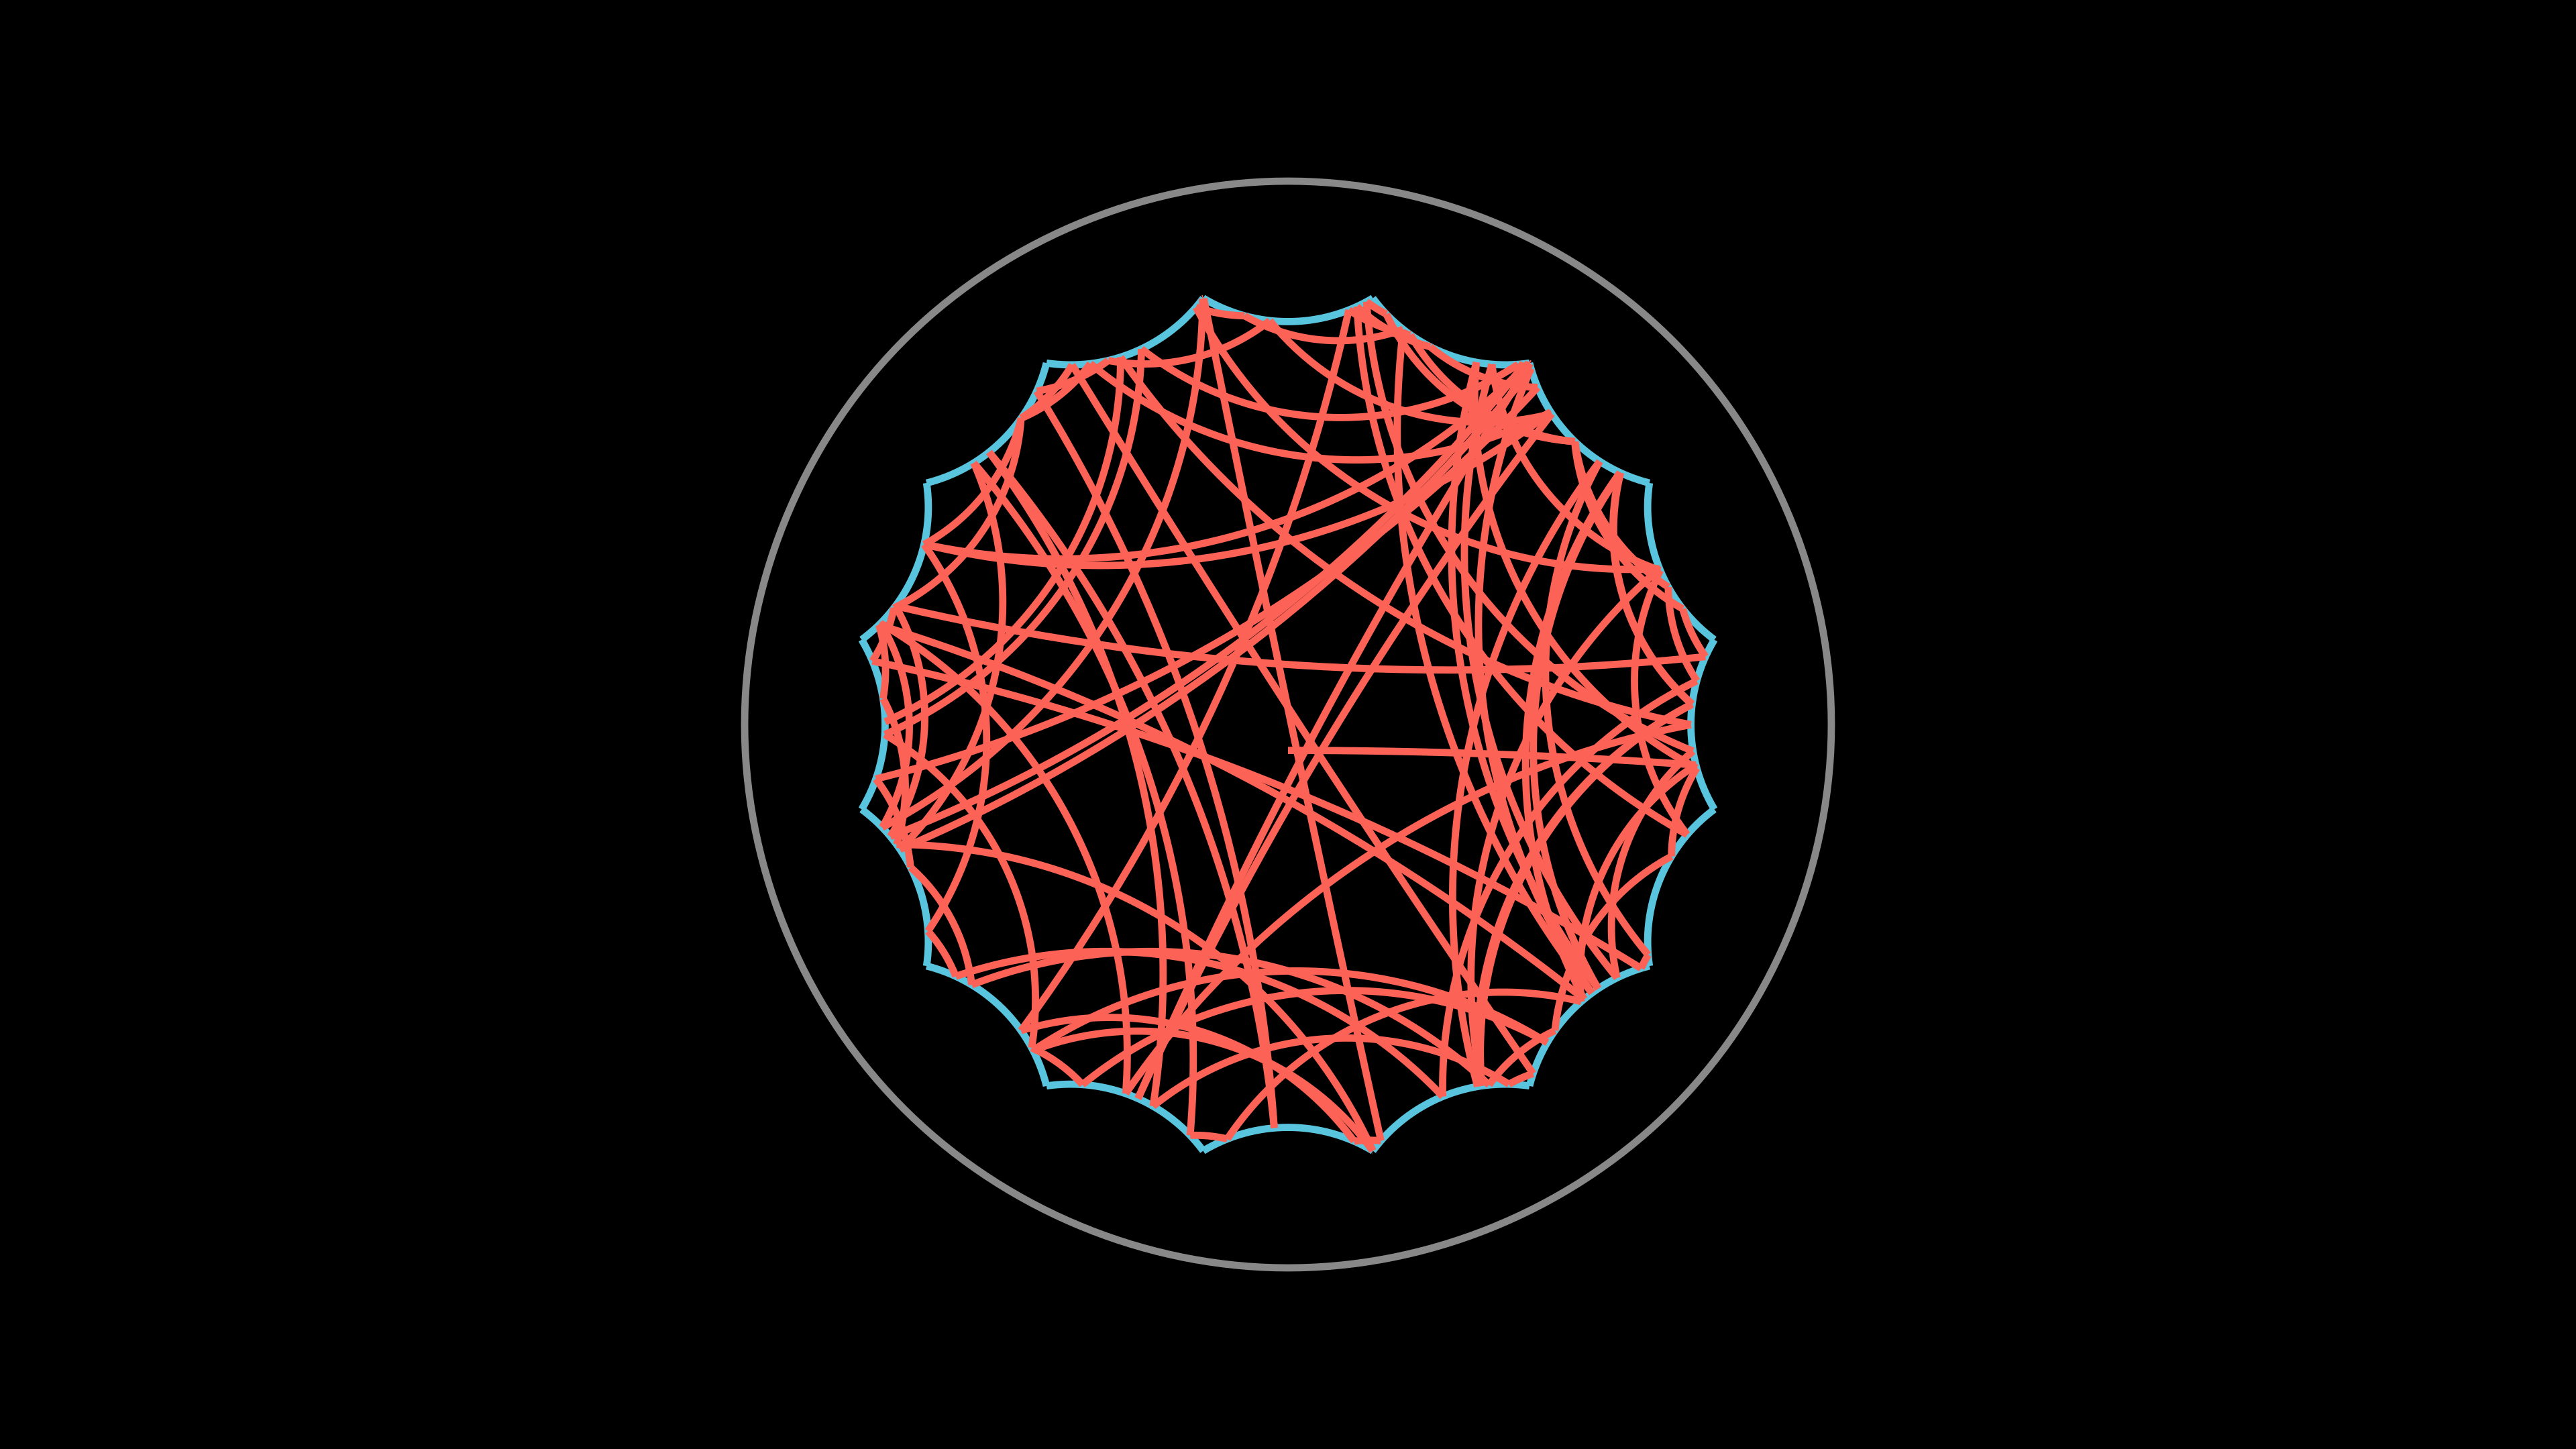

In [ ]:
# Example of using the built-in %%manim IPython magic command
%%manim -qk -v WARNING  ArcBetweenPointsExample

class ArcBetweenPointsExample(Scene):
    def construct(self):
        vg = VGroup()

        circle = Circle(radius=1, stroke_color=GREY)
        vg.add(circle)

        for i in range(len(pol_radii)):
          if pol_radii[i] ==-1:
            # for lines
            arc = Line(start=[pol_coords[i].real,pol_coords[i].imag,0], end=[pol_coords[i+1].real,pol_coords[i+1].imag,0], stroke_color=BLUE)
          else:
            arc = ArcBetweenPoints(start=[pol_ordered_coords[i,0].real,pol_ordered_coords[i,0].imag,0], end=[pol_ordered_coords[i,1].real,pol_ordered_coords[i,1].imag,0], radius = pol_radii[i], stroke_color = BLUE)
          vg.add(arc)
        for i in range(len(radiiPD)):
          if radiiPD[i] ==-1:
            # for lines
            arc = Line(start=[coordsPD[i].real,coordsPD[i].imag,0], end=[coordsPD[i+1].real,coordsPD[i+1].imag,0], stroke_color=RED)
          else:
            arc = ArcBetweenPoints(start=[ordered_coords[i,0].real,ordered_coords[i,0].imag,0], end=[ordered_coords[i,1].real,ordered_coords[i,1].imag,0], radius = radiiPD[i], stroke_color=RED)
          vg.add(arc)
        self.add(vg.scale(3))

# Phasespace for Compact Polygons

In [ ]:
def start_compact_billiards_UHP2(eta, ref, ordered_vertices, p0, coll_p, ideal_endpoint, N, index):
    coords = [p0, coll_p]
    #ideal_endpoints_angles = np.zeros((N,2))

    for i in range(N):
      ideal_endpoint = reflUHP(ref[index],ideal_endpoint)
      start = reflUHP(ref[index],coll_p)
      #search for the collision point coll_p of the ball with one side s of the 
      coll_p, index = findColCompact(eta,ordered_vertices, ideal_endpoint, coll_p, index)
      coords.append(coll_p)
      if abs(coords[-2]-coords[0]) < 10e-3 and abs(coords[-1]-coords[1]) < 10e-3: 
        return i+1, coords
    return N, coords


In [ ]:
def getValidSegment(ordered_vertices, eta, e1, e2):
  # eta: ideal endpoint of sides of polygon
  # e0, e1: ideal endpoints of segment
  # We want to find the valid segment in the interior of the compact polygon
  intersections = []
  indices = []
  
  #First we compute all the intersection points of the geodesic with the polygon. We only save the two right ones
  #print(eta.shape)
  for i in range(eta.shape[0]):
    if (e1> eta[i,0] and e1 < eta[i,1] and (e2>eta[i,1] or e2< eta[i,0])) or (e2> eta[i,0] and e2 < eta[i,1] and (e1>eta[i,1] or e1< eta[i,0])):
      inter_p = intersect(eta[i,0],eta[i,1],e1,e2)
      if inter_p.real > ordered_vertices[i,0] and inter_p.real < ordered_vertices[i,1].real:
        intersections.append(inter_p)
        indices.append(i)
  if len(intersections) == 2:
    if abs(intersections[1].real - e1) < abs(intersections[0].real - e1):
      return intersections[0],intersections[1],e1, indices[1], True
    else:
      return intersections[1],intersections[0],e1, indices[0], True
  return 0, 0, 0, 0, False


In [ ]:
def phasespaceCompact(vertices_PD):
  # vertices_PD: vertices of polygon in Poincare disk 
  

  # Do some rearrangements and move to the upper half plane
  vertices = np.sort([xi(vert) for vert in vertices_PD ])

  eta = initCompactPolygon(vertices)
  ordered_vertices = np.zeros((len(vertices),2),dtype = complex)
  ordered_vertices[:,0] = vertices
  ordered_vertices[:,1] = np.roll(vertices,-1)
  ordered_vertices = np.sort(ordered_vertices,axis=1)

  # build reflections
  ref = []
  for l in range(len(vertices)):
      ref.append(1/(eta[l,1]-eta[l,0]) * np.array([[eta[l,0]+eta[l,1], - 2 * eta[l,0] * eta[l,1]], [2, -(eta[l,0]+eta[l,1])]]))

  # Number of hits
  N= 1500
  N_ideal = 100

  # considered ideal endpoints
  ideal_PD =  np.exp(2 * np.pi * 1j/N_ideal * ( np.arange(N_ideal) + 1/2+1/(2* N_ideal)))
  ideal_points = [xi(ide) for ide in ideal_PD]
  ideal_points.reverse()
  #ideal_points = [-1,1]
  colored_segments = []

  for e0 in ideal_points:
    for e1 in ideal_points:
      if e0 != e1:
        # We are given some geodesic. First we find out whether this geodesic gives a segment in the compact polygon
        # We compute this segment. 
        p0, p1, ideal_endpoint, index, exists = getValidSegment(ordered_vertices, eta, e0, e1) 

        # If we have such a segment, we evolve the trajectory and check whether the trajectory comes back after n hits
        if exists:
          # If it comes back after n hits, label (eta0,eta1) with label n
          n, coords = start_compact_billiards_UHP2(eta, ref, ordered_vertices, p0, p1, ideal_endpoint, N, index)
          colored_segments.append([(np.angle(xi_inv(e0),deg=True)+360)%360, (np.angle(xi_inv(e1),deg=True)+360)%360, n])
          
  return colored_segments, coords, ordered_vertices, eta


In [ ]:
vertices_PD =  0.8 * np.exp(2 * np.pi * 1j/4 * (np.arange(4)+1/3))
segments, coords, ordered_vertices, eta = phasespaceCompact(vertices_PD)
segments = np.array(segments)
#print(segments[:,0])
#segments = np.flip(segments, axis=0)

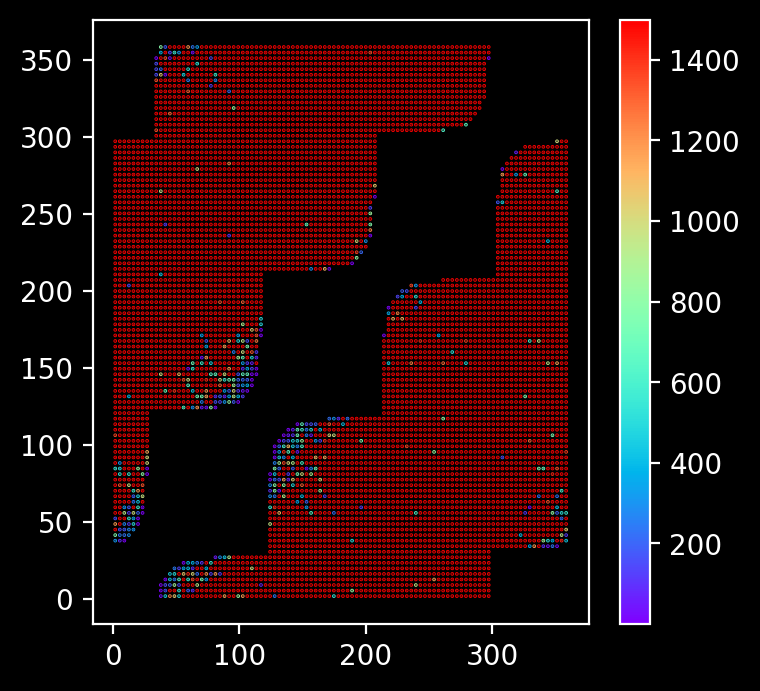

In [ ]:
plt.style.use('dark_background')
figure(figsize=(4,4), dpi= 200)
#plt.axis('off')

sc = plt.scatter(segments[:,0],segments[:,1],c = segments[:,2].astype(int), cmap='rainbow', s = 0.1)
plt.colorbar(sc)

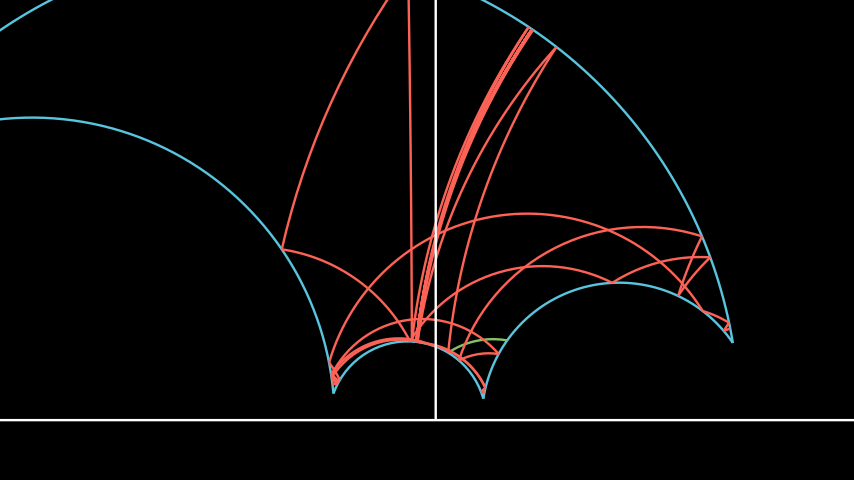

In [ ]:
# Example of using the built-in %%manim IPython magic command
%%manim -ql -v WARNING  ArcBetweenPointsExample

class ArcBetweenPointsExample(Scene):
    def construct(self):
        vg = VGroup()

        for i in range(len(eta)):
          arc = ArcBetweenPoints(start=[ordered_vertices[i,1].real,ordered_vertices[i,1].imag,0],end =[ordered_vertices[i,0].real,ordered_vertices[i,0].imag,0], radius = (eta[i,1]-eta[i,0])/2, stroke_color=BLUE)
          vg.add(arc)

          

        for i in range(len(coords)-1):
          if i==0:
            c,r = get_circle(coords[i],coords[i+1])
            if coords[i].real > coords[i+1].real:  
              arc = ArcBetweenPoints(start=[coords[i].real,coords[i].imag,0], end=[coords[i+1].real,coords[i+1].imag,0], radius = r, stroke_color=GREEN)
            else:
              arc = ArcBetweenPoints(start=[coords[i+1].real,coords[i+1].imag,0], end=[coords[i].real,coords[i].imag,0], radius = r, stroke_color=GREEN)
            vg.add(arc)
          else:
            c,r = get_circle(coords[i],coords[i+1])
            if coords[i].real > coords[i+1].real:  
              arc = ArcBetweenPoints(start=[coords[i].real,coords[i].imag,0], end=[coords[i+1].real,coords[i+1].imag,0], radius = r, stroke_color=RED)
            else:
              arc = ArcBetweenPoints(start=[coords[i+1].real,coords[i+1].imag,0], end=[coords[i].real,coords[i].imag,0], radius = r, stroke_color=RED)
            vg.add(arc)

        vg.add(Line(start = [-3,0,0],end = [3,0,0]))
        vg.add(Line(start = [0,0,0],end = [0,3,0]))
        
        #vg.add(Dot(color=RED, radius=0.05).move_to([ideal_endpoint.real,ideal_endpoint.imag,0]))
        #vg.add(Dot(color=BLUE, radius=0.05).move_to([coll_p.real,coll_p.imag,0]))
        
        self.add(vg.scale(3))

# Laminations

In [ ]:
def isLine(z1):
  if z1 ==-1j :
    return True
  else:
    return False
# TODO: Until now the convention is that a hyperbolic line in the upper half plane model is a Euklidean line if the first of the two endpoint is -1j

In [ ]:
def getPerpendicular(a,b,c,d):
  # Given two circles in the upper half plane, compute the perpendicular
  # a,b: endpoints determining the first hyperbolic segment
  # c,d: endpoints determining the first hyperbolic segment 
  #print(isLine(a,b), isLine(c,d))
  if not isLine(a) and  not isLine(c):
    # Check whether circles are ultraparallel
    a,b = np.sort([a,b])
    c,d = np.sort([c,d])  
    if b.real < c.real or d.real < a.real:
      z = 1 / ((c-a)**(-1)-(b-a)**(-1)) * ((d-a)**(-1) - (b-a)**(-1))
      e1 = 1/(((c-a)**(-1)-(b-a)**(-1))*np.sqrt(z) + (b-a)**(-1)) +a
      e2 = 1/(((c-a)**(-1)-(b-a)**(-1))* (-np.sqrt(z)) + (b-a)**(-1)) +a
      return e1,e2
    elif d.real < a.real or b.real < c.real:
      z = 1 / ((a-c)**(-1)-(d-c)**(-1)) * ((b-c)**(-1) - (d-c)**(-1))
      e1 = 1/(((a-c)**(-1)-(d-c)**(-1))*np.sqrt(z) + (d-c)**(-1)) +a
      e2 = 1/(((a-c)**(-1)-(d-c)**(-1))* (-np.sqrt(z)) + (d-c)**(-1)) +a
      return e1,e2
    elif c <a and b < d:
      z = 1 / ((a-c)**(-1)-(d-c)**(-1)) * ((b-c)**(-1) - (d-c)**(-1))
      e1 = 1/(((a-c)**(-1)-(d-c)**(-1))*np.sqrt(z) + (d-c)**(-1))+c
      e2 = 1/(((a-c)**(-1)-(d-c)**(-1))*(-np.sqrt(z)) + (d-c)**(-1))+c
      return e1,e2
    elif a <c and d < b:
      z = 1 / ((c-a)**(-1)-(b-a)**(-1)) * ((d-a)**(-1) - (b-a)**(-1))
      e1 = 1/(((c-a)**(-1)-(b-a)**(-1))*np.sqrt(z) + (b-a)**(-1))+c
      e2 = 1/(((c-a)**(-1)-(b-a)**(-1))*(-np.sqrt(z)) + (b-a)**(-1))+c
      return e1,e2
    #  print("lines not ultraparallel-1")
  elif isLine(a) and not isLine(c):
    c,d = np.sort([c,d]) 
    z = 1/(c-b) *(d-b)
    e1 = (c-b) * np.sqrt(z) +b
    e2 = (c-b) * (-np.sqrt(z)) +b
    return e1,e2
  elif not isLine(a) and isLine(c):
    a,b = np.sort([a,b])
    z = 1/(a-d) *(b-d)
    e1 = (a-d) * np.sqrt(z)+d
    e2 = (a-d) * (-np.sqrt(z))+d
    return e1,e2
  else:
    print("lines not ultraparallel-2")

In [ ]:
circles = [[-0.9,0.5],[-1.,1.]]
e1,e2 = getPerpendicular(-0.9,0.5,-1.,1.)
circles.append([e1,e2])
#circles = np.sort(circles,axis=1)
#circles = np.array(circles)
print(circles)

[[-0.9, 0.5], [-1.0, 1.0], [-0.4312706955911563, -2.3187293044088437]]


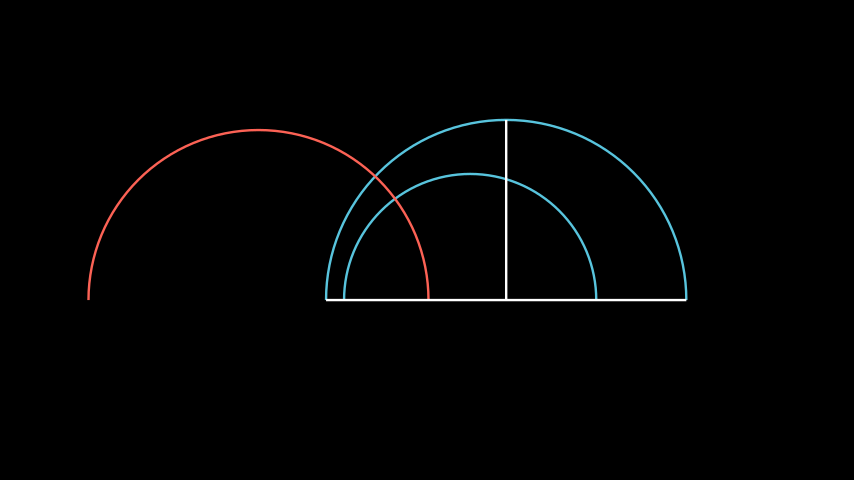

In [ ]:
# Example of using the built-in %%manim IPython magic command
%%manim -ql -v WARNING  ArcBetweenPointsExample

class ArcBetweenPointsExample(Scene):
    def construct(self):
        vg = VGroup()

        for i in range(len(circles)):
          if i==2:
            if isLine(circles[i][0]):
              arc = Line(start=[circles[i][1],0,0],end=[circles[i][1],2,0],stroke_color = RED)
            else:
              arc = ArcBetweenPoints(start=[np.max(circles[i]),0,0],end =[np.min(circles[i]),0,0], radius = np.abs(circles[i][1]-circles[i][0])/2, stroke_color=RED)
          else:

            if isLine(circles[i][0]):
              arc = Line(start=[circles[i][1],0,0],end=[circles[i][1],2,0],stroke_color = BLUE)
            else:
              arc = ArcBetweenPoints(start=[np.max(circles[i]),0,0],end =[np.min(circles[i]),0,0], radius = np.abs(circles[i][1]-circles[i][0])/2, stroke_color=BLUE)
          vg.add(arc)
        vg.add(Line(start=[-1,0,0], end=[1,0,0]))
        vg.add(Line(start=[0,0,0], end=[0,1,0]))

         
        
        #vg.add(Dot(color=RED, radius=0.05).move_to([ideal_endpoint.real,ideal_endpoint.imag,0]))
        #vg.add(Dot(color=BLUE, radius=0.05).move_to([coll_p.real,coll_p.imag,0]))
        
        self.add(vg.scale(3))

In [ ]:
def getIsometry(z1,z2,z3,w1,w2,w3):
  # returns the isometry mapping the points zi to wi
  a = np.linalg.det(np.array([[1,w1,w1*z1], [1,w2,w2*z2], [1,w3,w3*z3]]))
  b = np.linalg.det(np.array([[w1,z1,w1*z1], [w2,z2,w2*z2], [w3,z3,w3*z3]]))
  c = np.linalg.det(np.array([[1,w1,z1], [1,w2,z2], [1,w3,z3]]))
  d = np.linalg.det(np.array([[1,z1,w1*z1], [1,z2,w2*z2], [1,z3,w3*z3]]))
  return np.array([[a,b],[c,d]])

In [ ]:
def getTranslations(v, ident, orientation):
  # v: vertices of some polygon
  # ident: contains triples of sides which are identified by translation + orientation of identification. 
  # TODO: add the parameter
  # This function computes the translations which identify the sides of the polygon v
  isometries = []
  for i in range(len(ident)):
    a,b = getIdealEnpoints(v[ident[i][0]],v[(ident[i][0]+1)%len(v)])
    c,d = getIdealEnpoints(v[ident[i][1]],v[(ident[i][1]+1)%len(v)])
    e1,e2 = getPerpendicular(a,b,c,d)
    p1 = intersect(a,b,e1,e2) 
    p2 = intersect(c,d,e1,e2) 
    if orientation == 0:
      isometries.append(getIsometry(v[ident[i][0]],p1,v[(ident[i][0]+1)%len(v)], v[ident[i][1]],p2,v[(ident[i][1]+1)%len(v)]))
    else:
      isometries.append(getIsometry(v[ident[i][0]],p1,v[(ident[i][0]+1)%len(v)], v[(ident[i][1]+1)%len(v)],p2,v[ident[i][1]]))
  return isometries

In [ ]:
def applyIsometry(isom, z):
  # applies the isometry isom to the point z
  return (isom[0,0]*z + isom[0,1])/(isom[1,0]*z + isom[1,1])

In [ ]:
v = [-1,0,1,2]
ident = [[0,2],[1,3]]
transl = getTranslations(v, ident, 1)

In [ ]:
print(transl)

[array([[9.37444310e-16+1.29903811j, 1.44222201e-16+0.4330127j ],
       [6.73036940e-16+0.8660254j , 1.68259235e-16+0.4330127j ]]), array([[2.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j]])]


In [ ]:
def constructTranslationSequences(d):
  # Constructs the sequences for the translations to construct the lamination
  # d: depth to which we want to draw the lamination
  # ident: which sides are identified
  valid = [[0,1,3],[0,1,2],[1,2,3],[0,2,3]]
  seq = []
  tmp_seq = []
  for j in range(4):
    for k in range(3):
      tmp_seq.append([j,valid[j][k]])
  seq.append(tmp_seq)

  for i in range(1,d):
    tmp_seq = []
    for se in seq[i-1]:
      for k in range(3):
        #print(se[i-1])
        tmp_seq.append(se + [valid[se[i-1]][k]])
    seq.append(tmp_seq)
  return seq

In [ ]:
def translateGeodesic(v, ident, orientation, end1, end2):
  # This function translates a geodesic segment on a fundamental domain to the other domains
  # For now, we only translate the common perpendicular of side 0 and side 2.
  # v: the considered polygon. For now a rectangle
  # ident: list of tuples of sides which we identify
  # orientation: list of orientation: Tells us the orientation of the identification.

  transl = getTranslations(v, ident, orientation)
  #print(transl)
  
  # determine the points p1,p2 at which the common perpendicular of side 0 and 2 meets side 0 and side 2.
  #a,b = getIdealEnpoints(v[ident[0][0]],v[(ident[0][0]+1)%len(v)])
  #c,d = getIdealEnpoints(v[ident[0][1]],v[(ident[0][1]+1)%len(v)])
  #e1,e2 = getPerpendicular(a,b,c,d)
  #p1 = intersect(a,b,e1,e2) 
  #p2 = intersect(c,d,e1,e2)
  #end2 = e2

  # Here we choose p1 and p2; the endpoints of the geodesic segment we want to translate (the red line)
  #p1 = e2
  #p2 = v[3]

  # add the inverse translations to transl
  #for i in range(len(ident)):
  #  transl.append(np.linalg.inv(transl[i]))
  
  # For every translation, compute the next N translated copies (TODO: smart way of translating)
  transl = [np.linalg.inv(transl[0]), np.linalg.inv(transl[1]), transl[0], transl[1]]

  d = 5
  sides = []
  translSides = []
  for i in range(len(v)):
    sides.append([v[i],v[(i+1)%len(v)]])
    translSides.append([v[i],v[(i+1)%len(v)]])
  seq = constructTranslationSequences(d)

  
  translGeodesics = [[end1,end2]]
  # first translate along the initial polygon
  for i in range(len(v)):
    for k in range(len(v)):
      if k != (i+2)%len(v):
        translSides.append([applyIsometry(transl[i], v[k]), applyIsometry(transl[i], v[(k+1)%len(v)])])
        translGeodesics.append([applyIsometry(transl[i],end1),applyIsometry(transl[i],end2)])
  # now translate deeper
  for i in range(d):
    for se in seq[i]:
      # construct translation associated to se
      temp_trans = np.eye(2)
      for j in range(len(se)):
        temp_trans =  transl[se[j]]  @ temp_trans
      for k in range(len(v)):
        translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
        translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])
  # Some additional translations to make the image look nicer
  for i in range(4):
    for j in range(4):
      if (j - i)%2 ==1:
        temp_trans =  transl[(i+2)%4]@ transl[j]@ transl[i]
        for k in range(len(v)):
          translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
          translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])
        
        temp_trans =  transl[(j+2)%4] @ temp_trans
        for k in range(len(v)):
          translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
          translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])
        
        temp_trans = transl[i] @ temp_trans
        for k in range(len(v)):
          translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
          translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])
        
        temp_trans = transl[j] @ temp_trans
        for k in range(len(v)):
          translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
          translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])

        temp_trans = transl[(i+2)%4]@ temp_trans
        for k in range(len(v)):
          translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
          translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])

        temp_trans = transl[(j+2)%4] @ temp_trans
        for k in range(len(v)):
          translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
          translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])

        temp_trans = transl[i] @ temp_trans
        for k in range(len(v)):
          translSides.append([applyIsometry(temp_trans, v[k]), applyIsometry(temp_trans, v[(k+1)%len(v)])])
          translGeodesics.append([applyIsometry(temp_trans,end1),applyIsometry(temp_trans,end2)])

  return translGeodesics, translSides

In [ ]:
# define the polygon. we do that in the upper half plane. 
v_PD = np.exp(2 * np.pi * 1j/4 * (np.arange(4)+1/2)   )
v = np.sort([xi(v_PD[i]) for i in range(4) ])

# find the ideal endpoints e1 and e2 of the translation axis of the first translation
a_,b_ = getIdealEnpoints(v[ident[0][0]],v[(ident[0][0]+1)%len(v)])
c_,d_ = getIdealEnpoints(v[ident[0][1]],v[(ident[0][1]+1)%len(v)])
e1_,e2_ = getPerpendicular(a_,b_,c_,d_)

# define which sides should be identified          
ident = [[0,2],[1,3]]
# define the orientation by which we identify. 1 corresponds to the identification we make to obtain the torus
orientation = 1
# Compute the translated geodesics and sides from v, ident and the orientation
transl_Geodesics, transl_Sides = translateGeodesic(v, ident, orientation, end1 = v[3], end2 = e1_)
transl_Geodesics2, tmp = translateGeodesic(v, ident, orientation, end1 = v[1], end2 = e2_)
#transl_Geodesics3, tmp = translateGeodesic(v, ident, orientation, end1 = v[1], end2 = v[3])

In [ ]:
# Here we just convert the obtained data in order to plot them correctly in manim in the disk model

from h2geometry import *
nr = len(v)

pol_coordsPD = []
for i in range(len(transl_Sides)):
  pol_coordsPD.append([xi_inv(transl_Sides[i][0]),xi_inv(transl_Sides[i][1])])
  pol_coordsPD[i] = reorder(pol_coordsPD[i])
  pol_coordsPD[i] = [pol_coordsPD[i][0,0], pol_coordsPD[i][0,1]]
pol_radiiPD = []
for i in range(len(transl_Sides)):
  r,c = H2_segment(pol_coordsPD[i][0],pol_coordsPD[i][1]).get_circle()
  pol_radiiPD.append(r)


coordsPD = []
for i in range(len(transl_Geodesics)):
  coordsPD.append([xi_inv(transl_Geodesics[i][0]),xi_inv(transl_Geodesics[i][1])])
  coordsPD[i] = reorder(coordsPD[i])
  coordsPD[i] = [coordsPD[i][0,0], coordsPD[i][0,1]]
radiiPD = []
for i in range(len(transl_Geodesics)):
  r,c = H2_segment(coordsPD[i][0],coordsPD[i][1]).get_circle()
  radiiPD.append(r)

coordsPD2 = []
for i in range(len(transl_Geodesics2)):
  coordsPD2.append([xi_inv(transl_Geodesics2[i][0]),xi_inv(transl_Geodesics2[i][1])])
  coordsPD2[i] = reorder(coordsPD2[i])
  coordsPD2[i] = [coordsPD2[i][0,0], coordsPD2[i][0,1]]
radiiPD2= []
for i in range(len(transl_Geodesics2)):
  r,c = H2_segment(coordsPD2[i][0],coordsPD2[i][1]).get_circle()
  radiiPD2.append(r)
#movement_coords = mov(coordsPD)

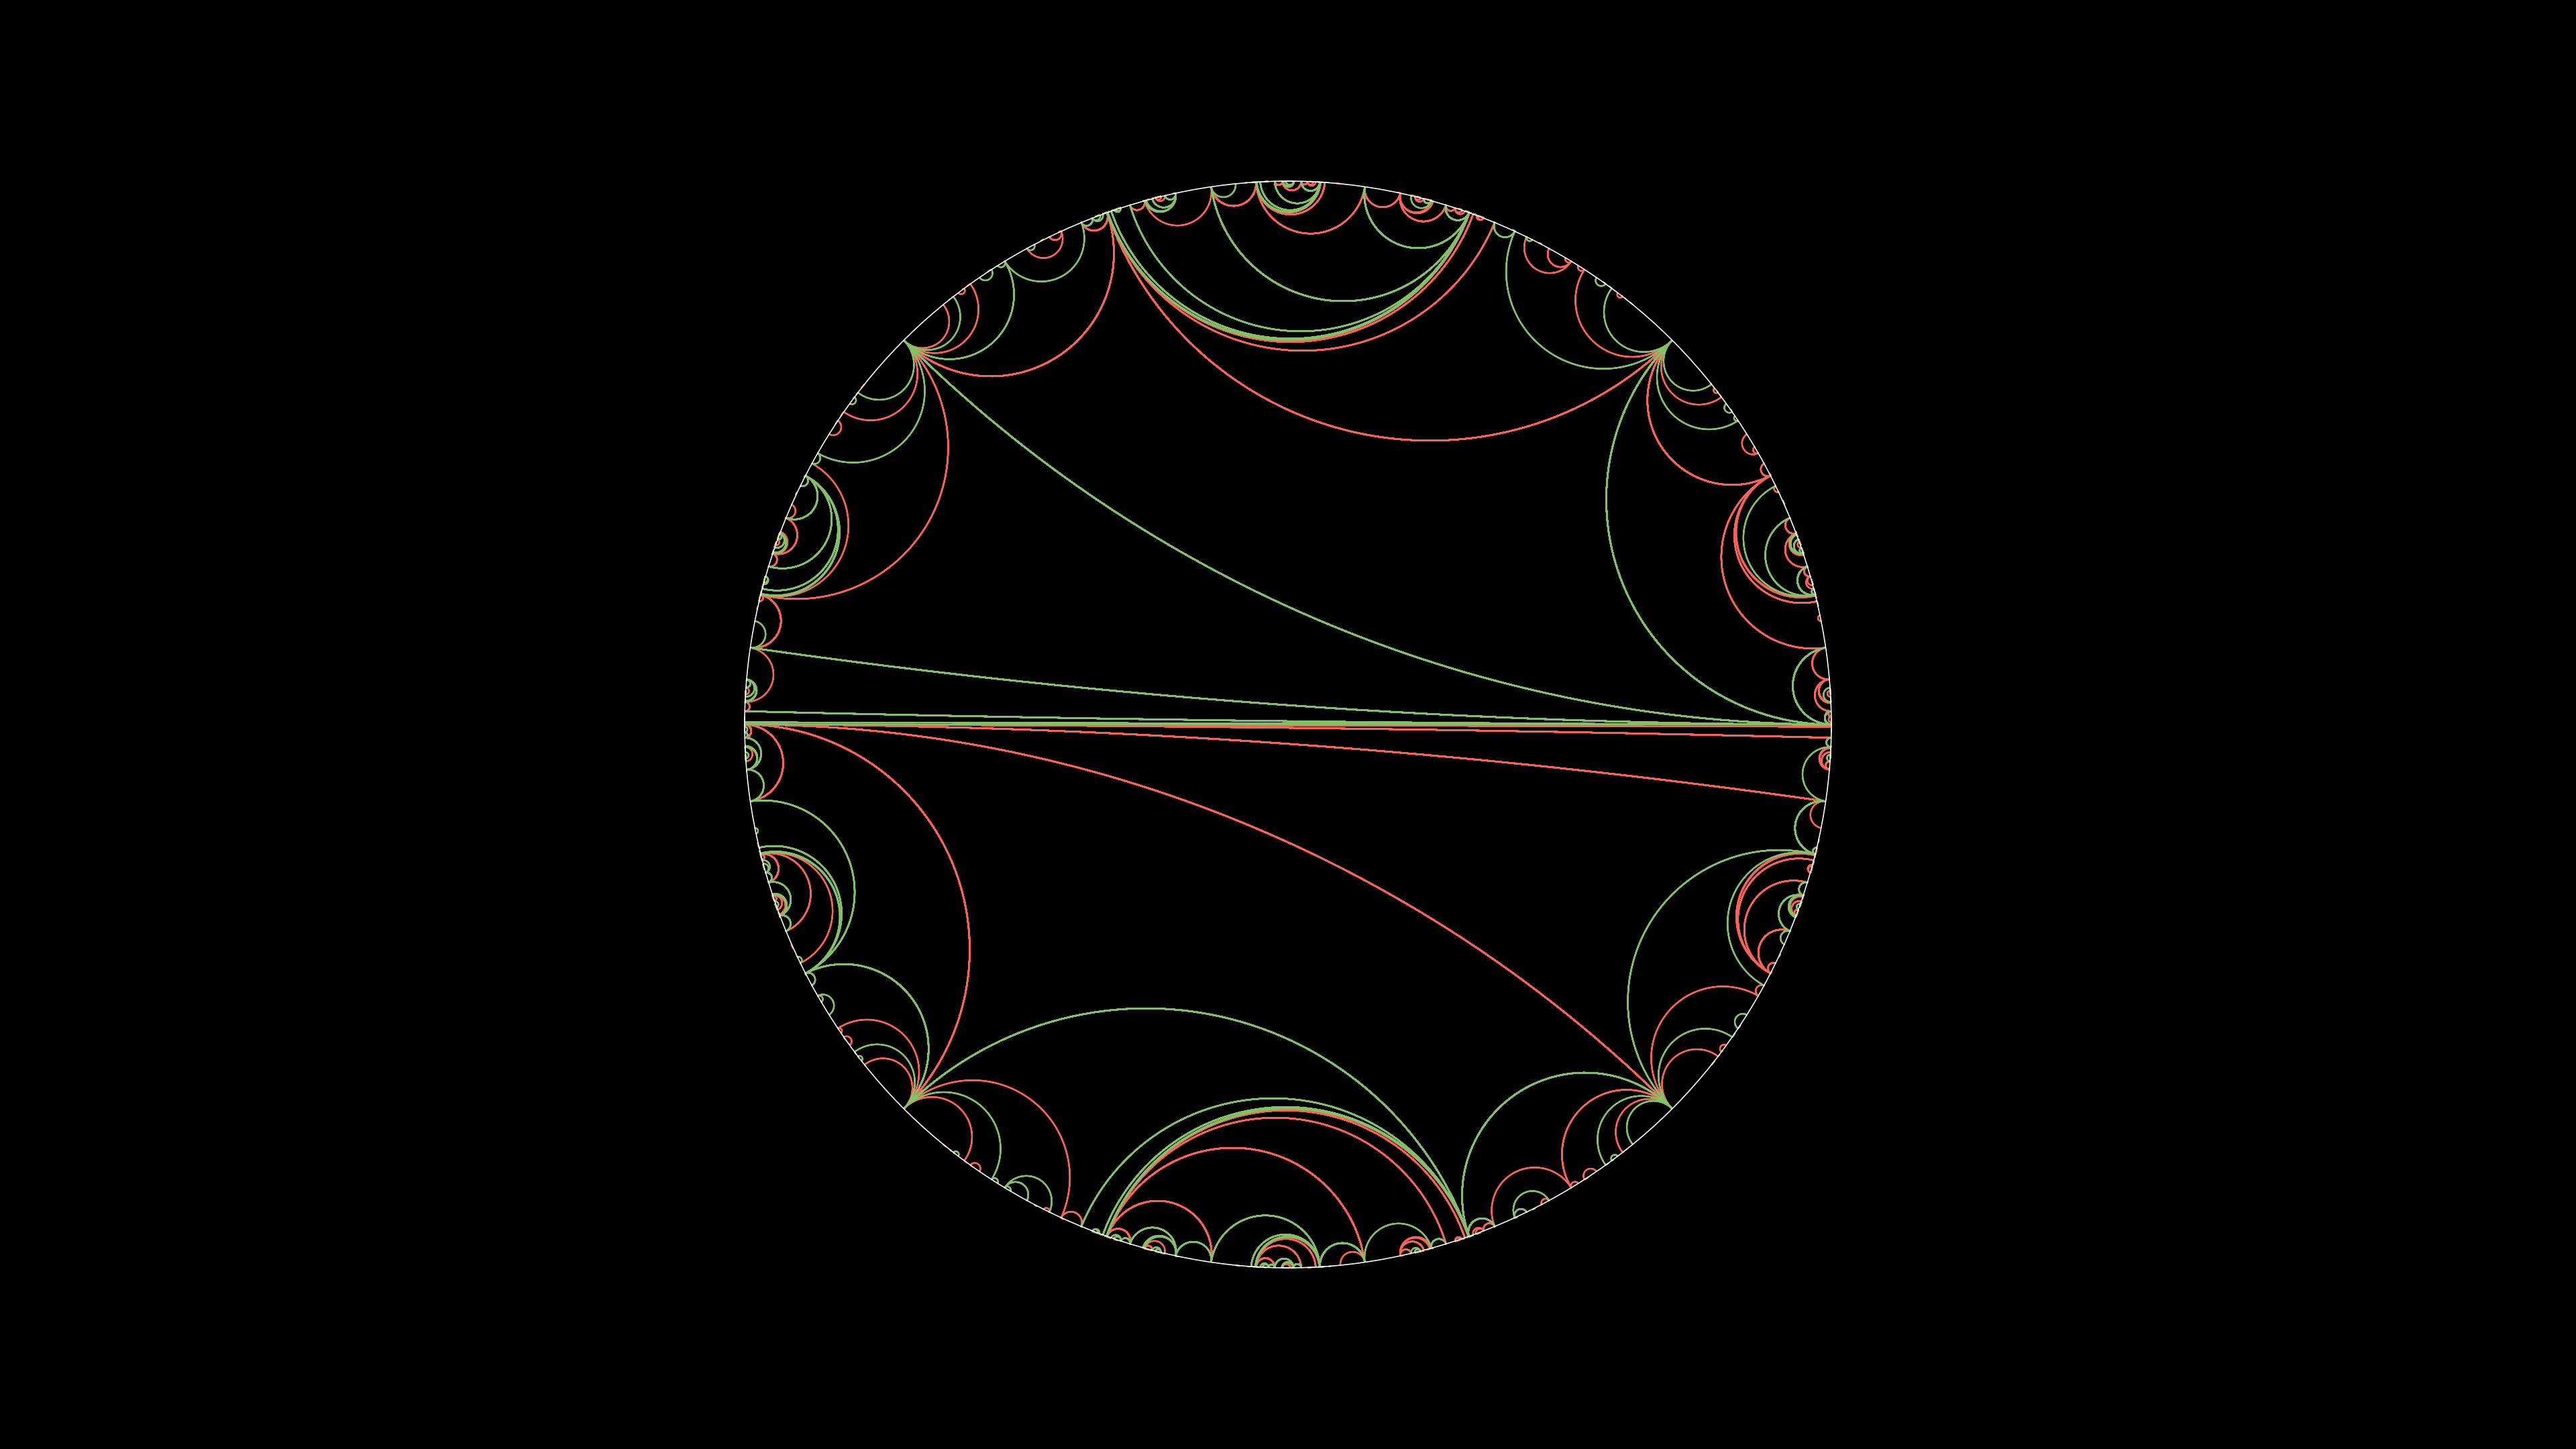

In [ ]:
# Example of using the built-in %%manim IPython magic command
%%manim -qk -v WARNING  ArcBetweenPointsExample

class ArcBetweenPointsExample(Scene):
    def construct(self):
        vg = VGroup()

        

        '''for i in range(len(pol_radiiPD)):
          if pol_radiiPD[i] ==-1:
            # for lines
            arc = Line(start=[pol_coordsPD[i][0].real,pol_coordsPD[i][0].imag,0], end=[pol_coordsPD[i][1].real,pol_coordsPD[i][1].imag,0], stroke_color=BLUE,  stroke_width=0.6)
          else:
            arc = ArcBetweenPoints(start=[pol_coordsPD[i][0].real,pol_coordsPD[i][0].imag,0], end=[pol_coordsPD[i][1].real,pol_coordsPD[i][1].imag,0], radius = pol_radiiPD[i], stroke_color=BLUE, stroke_width=0.6)
          vg.add(arc)'''
        for i in range(len(radiiPD)):
          if radiiPD[i] ==-1:
            # for lines
            arc = Line(start=[coordsPD[i][0].real,coordsPD[i][0].imag,0], end=[coordsPD[i][1].real,coordsPD[i][1].imag,0], stroke_color=RED, stroke_width=0.6)
          else:
            arc = ArcBetweenPoints(start=[coordsPD[i][0].real,coordsPD[i][0].imag,0], end=[coordsPD[i][1].real,coordsPD[i][1].imag,0], radius = radiiPD[i], stroke_color=RED, stroke_width=0.8)
          vg.add(arc)

        for i in range(len(radiiPD2)):
          if radiiPD2[i] ==-1:
            # for lines
            arc = Line(start=[coordsPD2[i][0].real,coordsPD2[i][0].imag,0], end=[coordsPD2[i][1].real,coordsPD2[i][1].imag,0], stroke_color=GREEN, stroke_width=0.6)
          else:
            arc = ArcBetweenPoints(start=[coordsPD2[i][0].real,coordsPD2[i][0].imag,0], end=[coordsPD2[i][1].real,coordsPD2[i][1].imag,0], radius = radiiPD2[i], stroke_color=GREEN, stroke_width=0.8)
          vg.add(arc)
        
        circle = Circle(radius=1, stroke_color=WHITE, stroke_width = 0.6)
        vg.add(circle)
        self.add(vg.scale(3))

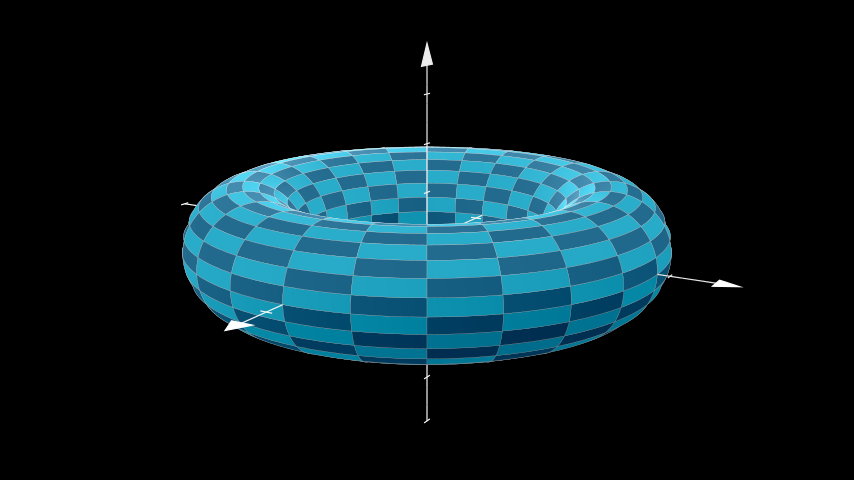

In [ ]:
# Example of using the built-in %%manim IPython magic command
%%manim -ql -v WARNING  ExampleTorus

class ExampleTorus(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        torus = Torus()
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, torus)

In [ ]:
# define the polygon. we do that in the upper half plane. 
v = [xi_inv(np.exp((2 * np.pi * i/8 + np.pi /8) *1j)) for i in range(8)]
print(v)
#v = [-2.,-1.,-0.5,0.,0.5,1.,2.,20.]
# define which sides should be identified          
ident = [[0,2],[1,3],[4,6],[5,7]]
# define the orientation by which we identify. 1 corresponds to the identification we make to obtain the torus
orientation = 1
# Compute the translated geodesics and sides from v, ident and the orientation
transl_Geodesics, transl_Sides = translateGeodesic(v, ident, orientation = 1, end1 = v[0], end2 = v[2])

[(-0.6681786379192989+0j), (-0.19891236737965803+0j), (0.19891236737965798+2.0816681711721685e-17j), (0.6681786379192989+0j), (1.4966057626654885-8.307830882489589e-17j), (5.02733949212584-0j), (-5.0273394921258445+4.1861010425740903e-16j), (-1.49660576266549+8.307830882489598e-17j)]


In [ ]:
# Here we just convert the obtained data in order to plot them correctly in manim in the disk model

from h2geometry import *
nr = len(v)

pol_coordsPD = []
for i in range(len(transl_Sides)):
  pol_coordsPD.append([xi_inv(transl_Sides[i][0]),xi_inv(transl_Sides[i][1])])
  pol_coordsPD[i] = reorder(pol_coordsPD[i])
  pol_coordsPD[i] = [pol_coordsPD[i][0,0], pol_coordsPD[i][0,1]]
pol_radiiPD = []
for i in range(len(transl_Sides)):
  r,c = H2_segment(pol_coordsPD[i][0],pol_coordsPD[i][1]).get_circle()
  pol_radiiPD.append(r)


coordsPD = []
for i in range(len(transl_Geodesics)):
  coordsPD.append([xi_inv(transl_Geodesics[i][0]),xi_inv(transl_Geodesics[i][1])])
  coordsPD[i] = reorder(coordsPD[i])
  coordsPD[i] = [coordsPD[i][0,0], coordsPD[i][0,1]]
radiiPD = []
for i in range(len(transl_Geodesics)):
  r,c = H2_segment(coordsPD[i][0],coordsPD[i][1]).get_circle()
  radiiPD.append(r)
#movement_coords = mov(coordsPD)

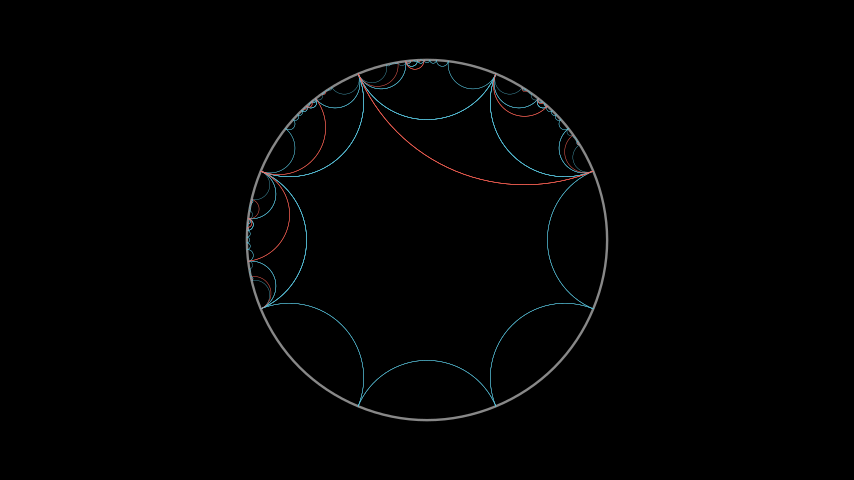

In [ ]:
# Example of using the built-in %%manim IPython magic command
%%manim -ql -v WARNING  ArcBetweenPointsExample

class ArcBetweenPointsExample(Scene):
    def construct(self):
        vg = VGroup()

        circle = Circle(radius=1, stroke_color=GREY)
        vg.add(circle)

        for i in range(len(pol_radiiPD)):
          if pol_radiiPD[i] ==-1:
            # for lines
            arc = Line(start=[pol_coordsPD[i][0].real,pol_coordsPD[i][0].imag,0], end=[pol_coordsPD[i][1].real,pol_coordsPD[i][1].imag,0], stroke_color=BLUE,  stroke_width=0.6)
          else:
            arc = ArcBetweenPoints(start=[pol_coordsPD[i][0].real,pol_coordsPD[i][0].imag,0], end=[pol_coordsPD[i][1].real,pol_coordsPD[i][1].imag,0], radius = pol_radiiPD[i], stroke_color=BLUE, stroke_width=0.6)
          vg.add(arc)
        for i in range(len(radiiPD)):
          if radiiPD[i] ==-1:
            # for lines
            arc = Line(start=[coordsPD[i][0].real,coordsPD[i][0].imag,0], end=[coordsPD[i][1].real,coordsPD[i][1].imag,0], stroke_color=RED, stroke_width=0.6)
          else:
            arc = ArcBetweenPoints(start=[coordsPD[i][0].real,coordsPD[i][0].imag,0], end=[coordsPD[i][1].real,coordsPD[i][1].imag,0], radius = radiiPD[i], stroke_color=RED, stroke_width=0.8)
          vg.add(arc)
        self.add(vg.scale(3))

# Some interactivity tests

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from h2geometry import *
import ipywidgets
from ipywidgets import interactive

In [ ]:
np.linspace(0.1,=:!, !)

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1,
       5.3, 5.5, 5.7, 5.9, 6.1, 6.3])

Manim Community v0.12.0

[11/26/21 14:03:57] INFO                                ]8;id=644800;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=804498;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py#718\718]8;;\
                             File ready at '/content/me                         
                             dia/images/drawLamination/                         
                             SceneName_ManimCE_v0.12.0.                         
                             png'                                               
                                                                                
                    INFO     Rendered SceneName                     ]8;id=543234;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=946805;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py#235\235]8;;\
                    

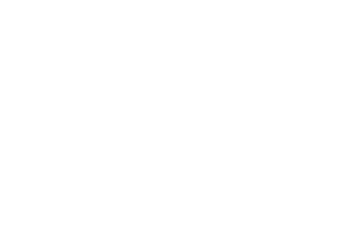

In [ ]:
# prebuild the images
for j in range(1,32):
  # define the polygon. we do that in the upper half plane. 
  v = [-1.,0.,1., xi(np.exp(0.1+0.2 * j * 1j * np.pi )).real]
  v = np.sort(v).tolist()
  #print(v)
  # define which sides should be identified          
  ident = [[0,2],[1,3]]
  # define the orientation by which we identify. 1 corresponds to the identification we make to obtain the torus
  orientation = 1
  # Compute the translated geodesics and sides from v, ident and the orientation
  transl_Geodesics, transl_Sides = translateGeodesic(v, ident, orientation, v[0], v[2])
  # Here we just convert the obtained data in order to plot them correctly in manim in the disk model

  nr = len(v)

  pol_coordsPD = []
  for i in range(len(transl_Sides)):
    pol_coordsPD.append([xi_inv(transl_Sides[i][0]),xi_inv(transl_Sides[i][1])])
    pol_coordsPD[i] = reorder(pol_coordsPD[i])
    pol_coordsPD[i] = [pol_coordsPD[i][0,0], pol_coordsPD[i][0,1]]
  pol_radiiPD = []
  for i in range(len(transl_Sides)):
    r,c = H2_segment(pol_coordsPD[i][0],pol_coordsPD[i][1]).get_circle()
    pol_radiiPD.append(r)


  coordsPD = []
  for i in range(len(transl_Geodesics)):
    coordsPD.append([xi_inv(transl_Geodesics[i][0]),xi_inv(transl_Geodesics[i][1])])
    coordsPD[i] = reorder(coordsPD[i])
    coordsPD[i] = [coordsPD[i][0,0], coordsPD[i][0,1]]
  radiiPD = []
  for i in range(len(transl_Geodesics)):
    r,c = H2_segment(coordsPD[i][0],coordsPD[i][1]).get_circle()
    radiiPD.append(r)

  # save obtained data to files
  np.save("pol_coordsPD", pol_coordsPD)
  np.save("pol_radiiPD", pol_radiiPD)
  np.save("coordsPD", coordsPD)
  np.save("radiiPD", radiiPD)

  # create the image using manim
  !manim -pql drawLamination.py SceneName

  # plot image 

  img = mpimg.imread('/content/media/images/drawLamination/SceneName_ManimCE_v0.12.0.png')
  plt.axis('off')
  plt.imsave(str(int(j))+".png",img)

In [ ]:
%matplotlib inline


def g(x):
  img = mpimg.imread(str(x)+'.png')
  fig, ax = plt.subplots(figsize=(15, 15))
  ax.set_axis_off()
  ax.imshow(img)
  plt.show()
interactive_plot = interactive(g, x=ipywidgets.IntSlider(min=1, max=31, step=1, value=3))
interactive_plot

interactive(children=(IntSlider(value=3, description='x', max=31, min=1), Output()), _dom_classes=('widget-int…

In [ ]:
print(xi_inv)